In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import pandas as pd
from op_op.event_ts import (
    events_to_time_series,
    event_time_series_time,
    events_to_time_series_df,
)

### Creating time series arrays from a set of events

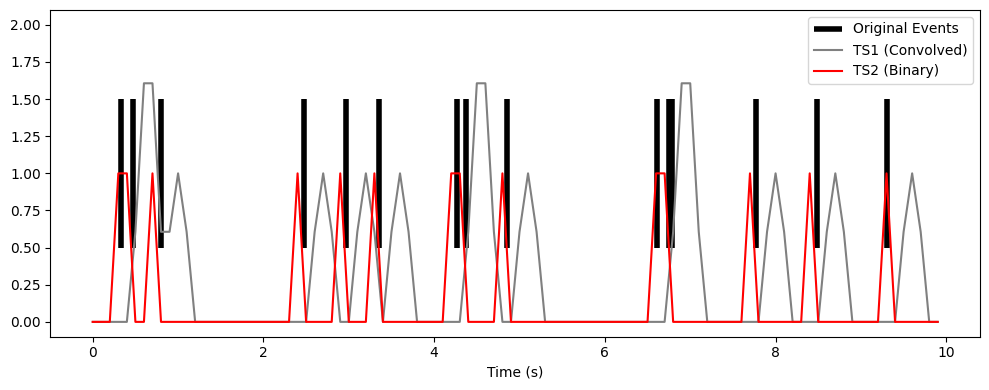

In [2]:
total_duration = 10
sampling_interval = 0.1
kernel = scipy.signal.windows.gaussian(3, 1)


event_timings = np.random.uniform(0, total_duration, size=15)
time_series = events_to_time_series(
    events_array=event_timings,
    sampling_interval=sampling_interval,
    kernel=kernel,
    total_duration=total_duration,
    shift=3,
)

time_series_bin = events_to_time_series(
    events_array=event_timings,
    sampling_interval=sampling_interval,
    total_duration=total_duration,
    kernel=None,
)
time = event_time_series_time(
    total_duration=total_duration, sampling_interval=sampling_interval
)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
ax.eventplot(event_timings, linewidths=4, color="black", label="Original Events")
ax.plot(time, time_series, color="grey", label="TS1 (Convolved)")
ax.plot(time, time_series_bin, color="red", label="TS2 (Binary)")
ax.legend()
ax.set_xlabel("Time (s)")
f.tight_layout()

### Creating multiple shifted time series from a single array of events

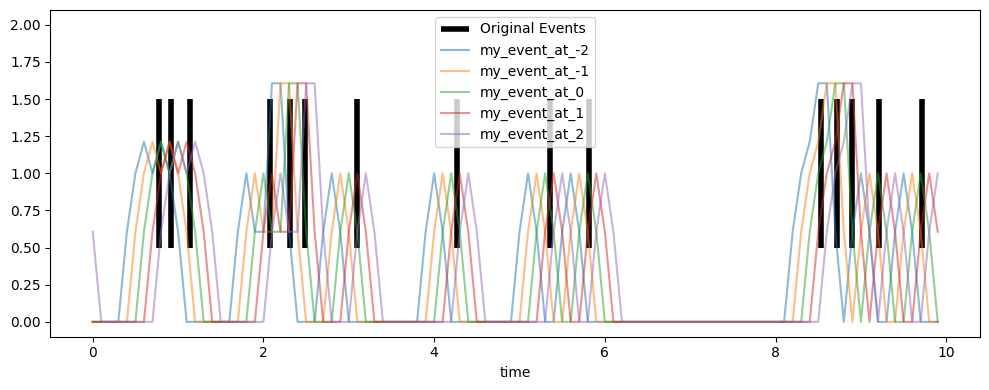

In [4]:
total_duration = 10
sampling_interval = 0.1
kernel = scipy.signal.windows.gaussian(3, 1)

event_timings = np.random.uniform(0, total_duration, size=15)
time_series_df = events_to_time_series_df(
    events_array=event_timings,
    event_name="my_event",
    total_duration=total_duration,
    num_shifts_forwards=2,
    num_shifts_backwards=2,
    sampling_interval=sampling_interval,
    kernel=kernel,
)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
ax.eventplot(event_timings, linewidths=4, color="black", label="Original Events")
time_series_df.set_index("time").plot(ax=ax, alpha=0.5)
ax.legend()
f.tight_layout()